In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Define the training function with various shuffling methods
def train_model(X, y, learning_rate=0.01, epochs=100, method='standard', hidden_dim1=10, hidden_dim2=5, batch_size=1):
    input_dim = X.shape[1]
    output_dim = 1  # Assuming a single output for regression
    model = NeuralNetwork(input_dim, hidden_dim1, hidden_dim2, output_dim)
    
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    dataset = TensorDataset(torch.Tensor(X), torch.Tensor(y))
    
    if method == 'single_shuffle':
        data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    else:
        data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    mse_list = []
    grad_norm_list = []

    for epoch in range(epochs):
        if method == 'random_reshuffle':
            data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        epoch_loss = 0
        grad_norm = 0
        
        for Xi, yi in data_loader:
            optimizer.zero_grad()
            y_pred = model(Xi)
            loss = criterion(y_pred, yi)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            grad_norm += sum(p.grad.norm().item() for p in model.parameters() if p.grad is not None)
        
        mse_list.append(epoch_loss / len(data_loader))
        grad_norm_list.append(grad_norm / len(data_loader))
        
#         # Optionally print progress
#         if epoch % 100 == 0:
#             print(f"Epoch {epoch}, MSE: {mse_list[-1]}, Gradient Norm: {grad_norm_list[-1]}")

    return model, mse_list, grad_norm_list




Method: standard, Learning Rate: 0.2


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Method: single_shuffle, Learning Rate: 0.2

Method: random_reshuffle, Learning Rate: 0.2


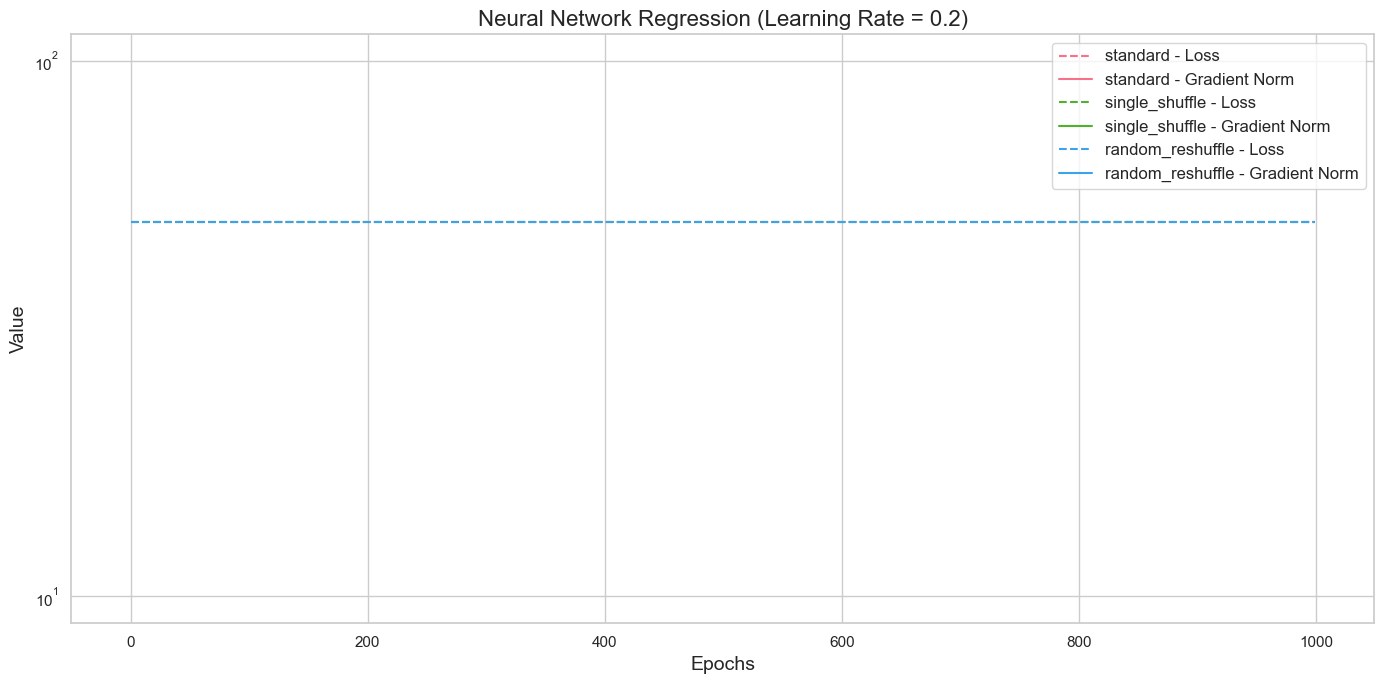


Method: standard, Learning Rate: 0.1

Method: single_shuffle, Learning Rate: 0.1

Method: random_reshuffle, Learning Rate: 0.1


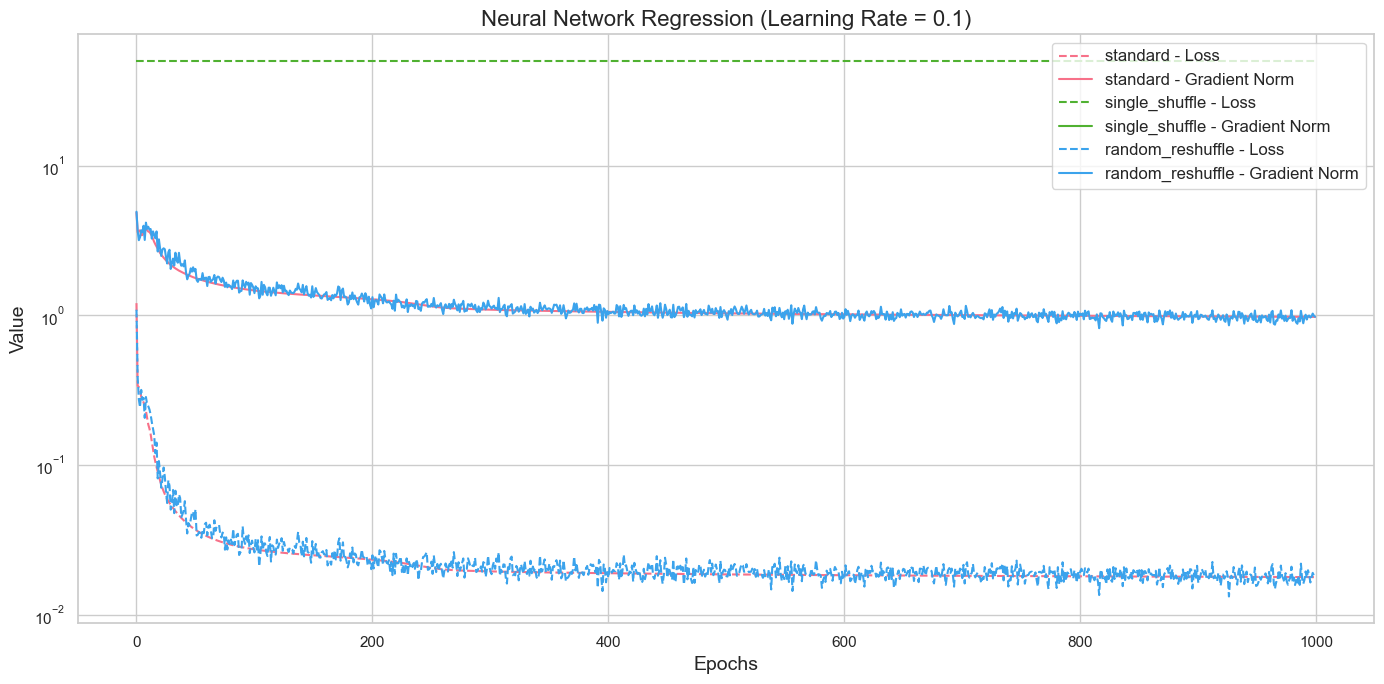


Method: standard, Learning Rate: 0.01

Method: single_shuffle, Learning Rate: 0.01

Method: random_reshuffle, Learning Rate: 0.01


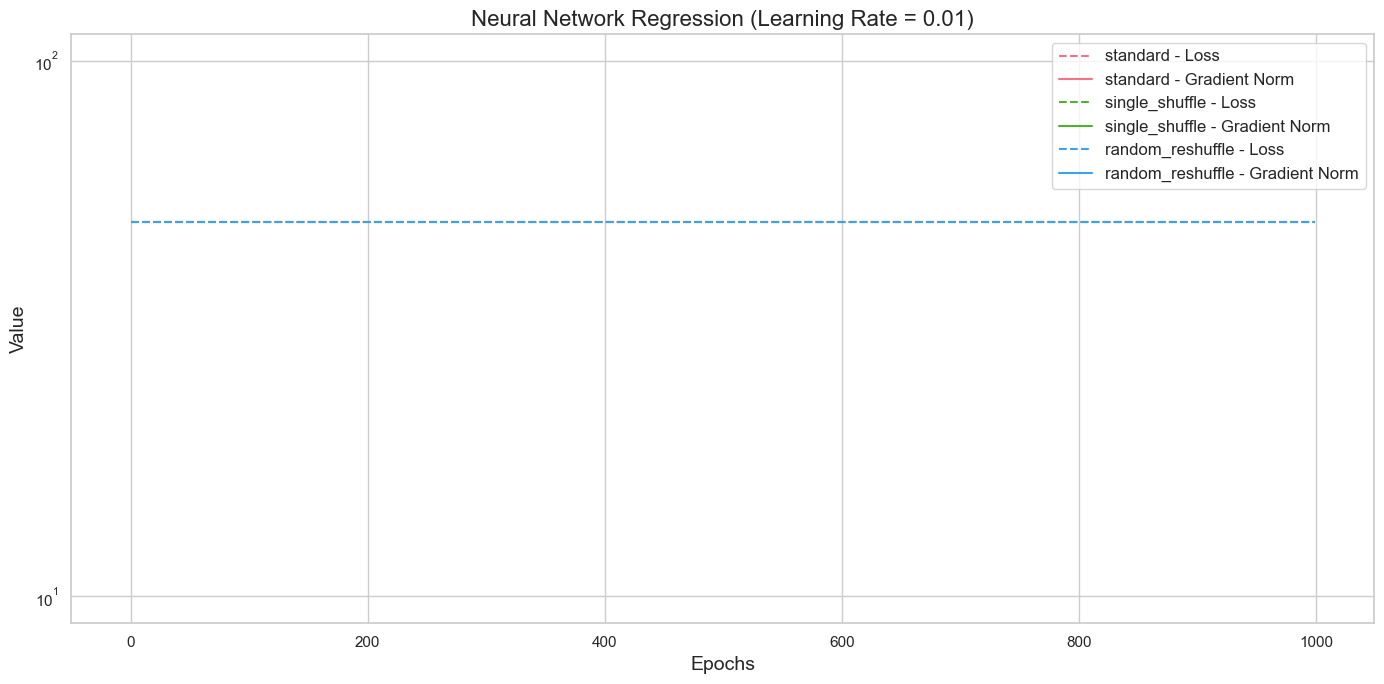

In [3]:
# Example usage
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    n = 100  # number of samples
    m = 4    # number of features
    X = 1 + np.random.normal(0, 1/10, (n, m))
#     true_weights = np.array([1.5, -2.0, 0.5, 3.0])
#     y = 4 + np.dot(X, true_weights) + np.random.randn(n) * 0.1  # adding noise
    y = 4 + np.inner(np.ones(m),  X)

    # Fit the model using different SGD methods
    methods = ['standard', 'single_shuffle', 'random_reshuffle']
    learning_rates = [0.2, 0.1, 0.01]
    
    # Set up seaborn
    sns.set(style='whitegrid')
    palette = sns.color_palette("dark",len(methods), as_cmap='True')

    for lr in learning_rates:
        plt.figure(figsize=(14, 7))
        for method, color in zip(methods, palette):
            print(f"\nMethod: {method}, Learning Rate: {lr}")
            model, mse, grad_norm = train_model(X, y, learning_rate=lr, epochs=1000, method=method)
            
            epochs = range(len(mse))
            plt.plot(epochs, mse, label=f'{method} - Loss', color=color, linestyle='--')
            plt.plot(epochs, grad_norm, label=f'{method} - Gradient Norm', color=color)

        plt.title(f'Neural Network Regression (Learning Rate = {lr})', fontsize=16)
        plt.legend(fontsize=12)
        plt.yscale('log')
        plt.xlabel('Epochs', fontsize=14)
        plt.ylabel('Value', fontsize=14)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
